# Задание 



  -  Выберите набор данных (датасет) для решения задачи классификации или регрессии.
  -  В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
  -  С использованием метода train_test_split разделите выборку на обучающую и тестовую.
  -  Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
  -  Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
  - Сравните метрики качества исходной и оптимальной моделей.

Выбранный датасет (алмазы):
Содержание:
- Цена в долларах США ($326--$18,823)
- Карат  (0.2--5.01)
- Качество обрезки (Низкое, Хорошее, Очень хорошее, Премиум, Идеальное)
- Цвет бриллианта, от J (худший) до D (лучший)
- Измерение прозрачности бриллианта (I1 (худшее), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучшее))
- X длина в мм (0--10.74)
- Y ширина в мм (0--58.9)
- Z глубина в мм (0--31.8)
- Общий процент глубины = z / среднее(x, y) = 2 * z / (x + y) (43--79)
- Ширина вершины бриллианта относительно самой широкой точки (43--95)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [13]:
data = pd.read_csv('diamonds.csv')

In [14]:
data.shape, data.price.shape

((53940, 11), (53940,))

In [15]:
data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [16]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пропущенных значений нет

In [17]:
data.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Закодируем категориальные признаки

In [36]:
df = pd.DataFrame(data)
cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
df['cut_encoded'] = df['cut'].map(cut_order)
df['color_encoded'] = df['color'].map(color_order)
df['clarity_encoded'] = df['clarity'].map(clarity_order)
df_encoded = df.drop(columns=['cut', 'color', 'clarity'])
print(df_encoded)

          id  carat  depth  table  price     x     y     z  cut_encoded  \
0          1   0.23   61.5   55.0    326  3.95  3.98  2.43            4   
1          2   0.21   59.8   61.0    326  3.89  3.84  2.31            3   
2          3   0.23   56.9   65.0    327  4.05  4.07  2.31            1   
3          4   0.29   62.4   58.0    334  4.20  4.23  2.63            3   
4          5   0.31   63.3   58.0    335  4.34  4.35  2.75            1   
...      ...    ...    ...    ...    ...   ...   ...   ...          ...   
53935  53936   0.72   60.8   57.0   2757  5.75  5.76  3.50            4   
53936  53937   0.72   63.1   55.0   2757  5.69  5.75  3.61            1   
53937  53938   0.70   62.8   60.0   2757  5.66  5.68  3.56            2   
53938  53939   0.86   61.0   58.0   2757  6.15  6.12  3.74            3   
53939  53940   0.75   62.2   55.0   2757  5.83  5.87  3.64            4   

       color_encoded  clarity_encoded  
0                  5                1  
1                  

Разделим выборку на обучающую и тестовую

In [18]:
from sklearn.model_selection import train_test_split

Выделим вектор переменных целевого признака, и матрицу признаков(без целевого)

In [37]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [38]:
print(X.head(), "\n")
print(y.head())

   id  carat  depth  table     x     y     z  cut_encoded  color_encoded  \
0   1   0.23   61.5   55.0  3.95  3.98  2.43            4              5   
1   2   0.21   59.8   61.0  3.89  3.84  2.31            3              5   
2   3   0.23   56.9   65.0  4.05  4.07  2.31            1              5   
3   4   0.29   62.4   58.0  4.20  4.23  2.63            3              1   
4   5   0.31   63.3   58.0  4.34  4.35  2.75            1              0   

   clarity_encoded  
0                1  
1                2  
2                4  
3                3  
4                1   

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
X_train.shape, y_train.shape,

((40455, 10), (40455,))

In [41]:
X_test.shape, y_test.shape

((13485, 10), (13485,))

Обучение модели ближайших соседей для произвольно заданного гиперпараметра K. Оценка качества модели с помощью подходящих для задачи метрик.

In [172]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
clf_i = KNeighborsRegressor(n_neighbors=14)
clf_i.fit(X_train, y_train)
y_pred = clf_i.predict(X_test)
len(y_pred), y_pred

(13485,
 array([ 563.35714286, 5914.71428571, 2562.14285714, ..., 3286.07142857,
        3733.85714286, 1362.92857143]))

Оценим качество модели

In [176]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [177]:
# Вычисление средней абсолютной ошибки
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Вычисление средней квадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Вычисление коэффициента детерминации
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Absolute Error: 109.04176598336775
Mean Squared Error: 303046.2055038478
R-squared Score: 0.980401117236128


In [178]:
y_test.head()

2714      564
14653    5914
52760    2562
48658     537
14812    5964
Name: price, dtype: int64

Подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оценка качество оптимальной модели.

# GridSearchCV

In [186]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

In [189]:

knn = KNeighborsRegressor()

# Задаем пространство поиска гиперпараметра K для GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}

# Задаем пространство поиска гиперпараметра K для RandomizedSearchCV
param_dist = {'n_neighbors': np.random.randint(1, 21, 10)}

# Создаем объект для среднеквадратичной ошибки (MSE)
mse_scorer = make_scorer(mean_squared_error)

In [190]:
# Используем GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=mse_scorer)
grid_search.fit(X_train, y_train)

# Получаем оптимальное значение гиперпараметра K
optimal_k_grid = grid_search.best_params_['n_neighbors']


In [191]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка среднеквадратичной ошибки:", grid_search.best_score_)

Лучшие параметры: {'n_neighbors': 20}
Лучшая оценка точности: 601444.8013628104


In [192]:
print("Результаты кросс-валидации:")
print(grid_search.cv_results_)


Результаты кросс-валидации:
{'mean_fit_time': array([0.09279599, 0.09398236, 0.09409814, 0.1053082 , 0.09882746,
       0.10410357, 0.0965457 , 0.09244637, 0.09257245, 0.09342775,
       0.09199548, 0.09364758, 0.09754262, 0.09590735, 0.09588385,
       0.09100242, 0.08847895, 0.08789721, 0.09055843, 0.09112573]), 'std_fit_time': array([0.00293514, 0.00177147, 0.0032515 , 0.00669447, 0.00306637,
       0.01049999, 0.00356681, 0.00172587, 0.00189465, 0.00237198,
       0.00064219, 0.0007525 , 0.00437408, 0.00570949, 0.00577967,
       0.00254459, 0.00118219, 0.00076338, 0.00291123, 0.00200385]), 'mean_score_time': array([0.03602352, 0.03520193, 0.03729749, 0.04579282, 0.04165211,
       0.04295373, 0.04052162, 0.03584752, 0.03685274, 0.03888483,
       0.03793411, 0.04074759, 0.04516377, 0.04355192, 0.0403306 ,
       0.03678441, 0.03681321, 0.03817787, 0.03976479, 0.04421868]), 'std_score_time': array([0.00121986, 0.00401333, 0.00357205, 0.00262782, 0.00321853,
       0.0020068 , 0.003

In [193]:
print("\nЛучшая модель:")
print(grid_search.best_estimator_)



Лучшая модель:
KNeighborsRegressor(n_neighbors=20)


In [194]:
print("\nСредние значения метрики по кросс-валидации:")
print(grid_search.cv_results_['mean_test_score'])



Средние значения метрики по кросс-валидации:
[ 46351.15392411  59436.51488691  73634.15065024  92541.6705228
 123240.61989865 155106.38726843 183797.70761466 216390.63883134
 248985.4295631  277752.78362254 310704.50081889 343811.70509328
 379684.94976243 408641.24268285 440926.86093036 469552.01065941
 497959.52124549 532354.09020028 568078.55059255 601444.80136281]


In [195]:
print("\nСтандартное отклонение метрики по кросс-валидации:")
print(grid_search.cv_results_['std_test_score'])


Стандартное отклонение метрики по кросс-валидации:
[20525.63983432 15476.89861101 11170.82370766 17093.52308604
 19692.49206277 19552.51902763 27837.28774828 27190.70074121
 25473.62056986 23111.58591726 25204.10485658 31423.2309298
 31692.6383995  29458.2922619  27968.11238377 24879.6934189
 22864.76542507 22618.13219389 19820.72159107 17747.8694827 ]


Изменение качества на тестовой выборке в зависимости от К-соседей:

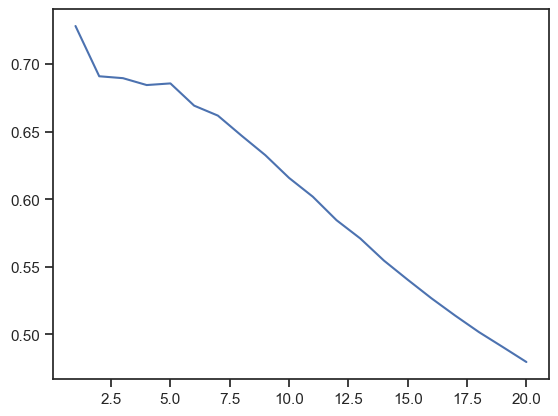

In [69]:
plt.plot(np.arange(1, 21), grid_search.cv_results_['mean_test_score'])

# RandomizedSearchCV 

In [61]:
# Используем RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Получаем оптимальное значение гиперпараметра K
optimal_k_random = random_search.best_params_['n_neighbors']

# Оцениваем качество оптимальной модели
accuracy_random = random_search.best_score_

c:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [62]:
print("Лучшие параметры:", random_search.best_params_)
print("Лучшая оценка точности:", random_search.best_score_)

Лучшие параметры: {'n_neighbors': 3}
Лучшая оценка точности: 0.689655172413793


In [63]:
print("Результаты кросс-валидации:")
print(random_search.cv_results_)

Результаты кросс-валидации:
{'mean_fit_time': array([0.09886489, 0.10250082, 0.10456305, 0.09861054, 0.10314331,
       0.1011992 , 0.09885659, 0.09939313, 0.10065713, 0.10666857]), 'std_fit_time': array([0.00208972, 0.00533237, 0.00980068, 0.00247603, 0.00161985,
       0.002913  , 0.00376441, 0.00622105, 0.00789994, 0.00748472]), 'mean_score_time': array([0.32124805, 0.32391577, 0.33318262, 0.32568369, 0.33784795,
       0.31701837, 0.31102324, 0.31612396, 0.3389092 , 0.3414659 ]), 'std_score_time': array([0.01039448, 0.00587623, 0.01751304, 0.01581539, 0.03777757,
       0.01155378, 0.00405018, 0.00512189, 0.01737869, 0.01500702]), 'param_n_neighbors': masked_array(data=[13, 11, 17, 13, 5, 3, 9, 9, 15, 18],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 13}, {'n_neighbors': 11}, {'n_neighbors': 17}, {'n_neighbors': 13}, {'n_neighbors': 5}, {'n_ne

In [64]:
print("\nЛучшая модель:")
print(random_search.best_estimator_)


Лучшая модель:
KNeighborsClassifier(n_neighbors=3)


In [65]:
print("\nСредние значения метрики по кросс-валидации:")
print(random_search.cv_results_['mean_test_score'])


Средние значения метрики по кросс-валидации:
[0.57100482 0.60192807 0.51390434 0.57100482 0.68577432 0.68965517
 0.63265357 0.63265357 0.54045235 0.50171796]


In [66]:
print("\nСтандартное отклонение метрики по кросс-валидации:")
print(random_search.cv_results_['std_test_score'])


Стандартное отклонение метрики по кросс-валидации:
[0.00084551 0.00224166 0.00109155 0.00084551 0.00505897 0.0026195
 0.00134121 0.00134121 0.0007754  0.00203927]


# Построение оптимальной модели (k = 1)

In [72]:
clf_o = KNeighborsClassifier(n_neighbors=1)
clf_o.fit(X_train, y_train)
target_o = clf_o.predict(X_test)
len(target_o), target_o

(13485, array([ 564, 5914, 2562, ..., 3286, 3734, 1363], dtype=int64))

# Сравнение метрик качества исходной и оптимальной моделей.

In [75]:
# исходная модель
accuracy_score(y_test, y_pred)

0.5451983685576567

In [74]:
accuracy_score(y_test, target_o)

0.714275120504264

In [77]:
from typing import Dict


In [86]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    classes = np.unique(y_true)
    res = dict()
    for c in classes:
        temp_data_flt = df[df['t']==c]
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [79]:
# исходная модель
accuracy_score_for_classes(y_test, y_pred)

{327: 0.0,
 339: 0.0,
 340: 0.0,
 342: 0.0,
 353: 0.0,
 354: 0.0,
 357: 0.0,
 363: 0.0,
 364: 0.0,
 367: 0.5,
 368: 0.0,
 373: 0.0,
 374: 0.0,
 376: 0.0,
 378: 1.0,
 379: 0.0,
 380: 0.0,
 382: 1.0,
 383: 0.0,
 384: 0.0,
 386: 0.0,
 388: 1.0,
 389: 0.0,
 391: 1.0,
 393: 0.6,
 394: 1.0,
 397: 0.0,
 399: 1.0,
 400: 0.0,
 401: 0.5,
 402: 1.0,
 403: 1.0,
 404: 1.0,
 405: 0.0,
 407: 1.0,
 408: 1.0,
 409: 0.0,
 411: 0.0,
 412: 0.0,
 413: 0.4,
 415: 0.0,
 416: 0.0,
 417: 1.0,
 418: 0.5,
 419: 1.0,
 420: 0.0,
 421: 0.9473684210526315,
 422: 1.0,
 424: 0.0,
 425: 0.0,
 426: 0.0,
 427: 1.0,
 429: 1.0,
 430: 0.5,
 431: 1.0,
 432: 0.8181818181818182,
 434: 1.0,
 435: 1.0,
 436: 0.75,
 438: 0.5,
 439: 1.0,
 440: 0.0,
 441: 0.0,
 442: 1.0,
 445: 1.0,
 446: 1.0,
 447: 1.0,
 449: 1.0,
 450: 0.2857142857142857,
 451: 0.0,
 452: 0.8,
 453: 0.5,
 454: 1.0,
 456: 0.0,
 457: 1.0,
 458: 0.5,
 459: 0.2857142857142857,
 460: 0.0,
 461: 0.7777777777777778,
 462: 1.0,
 463: 0.6,
 464: 1.0,
 465: 1.0,
 466: 0.0,


In [84]:
accuracy_score_for_classes(y_test, target_o)

{327: 0.0,
 339: 0.0,
 340: 0.0,
 342: 0.0,
 353: 1.0,
 354: 0.0,
 357: 0.5,
 363: 0.5,
 364: 1.0,
 367: 1.0,
 368: 1.0,
 373: 1.0,
 374: 1.0,
 376: 0.0,
 378: 1.0,
 379: 1.0,
 380: 1.0,
 382: 1.0,
 383: 0.0,
 384: 1.0,
 386: 1.0,
 388: 1.0,
 389: 1.0,
 391: 1.0,
 393: 0.8,
 394: 1.0,
 397: 1.0,
 399: 1.0,
 400: 1.0,
 401: 1.0,
 402: 1.0,
 403: 1.0,
 404: 1.0,
 405: 1.0,
 407: 1.0,
 408: 0.8,
 409: 0.0,
 411: 1.0,
 412: 0.5,
 413: 1.0,
 415: 0.0,
 416: 0.0,
 417: 1.0,
 418: 1.0,
 419: 1.0,
 420: 0.5,
 421: 0.8947368421052632,
 422: 0.8333333333333334,
 424: 1.0,
 425: 1.0,
 426: 0.6666666666666666,
 427: 1.0,
 429: 1.0,
 430: 0.5,
 431: 1.0,
 432: 0.9090909090909091,
 434: 1.0,
 435: 1.0,
 436: 1.0,
 438: 1.0,
 439: 1.0,
 440: 0.0,
 441: 0.0,
 442: 1.0,
 445: 1.0,
 446: 1.0,
 447: 0.9230769230769231,
 449: 1.0,
 450: 0.8571428571428571,
 451: 1.0,
 452: 0.8,
 453: 0.8333333333333334,
 454: 0.6666666666666666,
 456: 0.3333333333333333,
 457: 1.0,
 458: 1.0,
 459: 0.7142857142857143,
 46

### Метрика balanced_accuracy score 

In [134]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    res = [1 if x==target else 0 for x in array]
    return res

In [88]:
bin_y_train = convert_target_to_binary(y_train, 2)
list(zip(y_train, bin_y_train))[:10]

[(504, 0),
 (9576, 0),
 (3619, 0),
 (13417, 0),
 (4200, 0),
 (6951, 0),
 (665, 0),
 (9107, 0),
 (11530, 0),
 (666, 0)]

In [135]:
bin_y_test = convert_target_to_binary(y_test, 2)
list(zip(y_test, bin_y_test))[:10]

[(564, 0),
 (5914, 0),
 (2562, 0),
 (537, 0),
 (5964, 0),
 (984, 0),
 (5247, 0),
 (611, 0),
 (9645, 0),
 (1162, 0)]

In [137]:
bin_target_i = convert_target_to_binary(y_pred, 2)
balanced_accuracy_score(bin_y_test, bin_target_i)

1.0

In [138]:
bin_target_o = convert_target_to_binary(target_o, 2)
balanced_accuracy_score(bin_y_test, bin_target_o)

1.0

### Метрика "Матрица ошибок"

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

In [115]:
# Получаем уникальные значения в истинных значениях y_true
unique_labels = np.unique(y_test)

# Обновляем параметр labels, учитывая уникальные метки
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)
print(conf_matrix) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [116]:
# Получаем уникальные значения в истинных значениях y_true
unique_labels = np.unique(y_test)

# Обновляем параметр labels, учитывая уникальные метки
conf_matrix = confusion_matrix(y_test, target_o, labels=unique_labels)
print(conf_matrix) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


### Метрика Precision

In [164]:
bin_clf_i = KNeighborsClassifier(n_neighbors=20)
bin_clf_i.fit(X_train, bin_y_train)
bin_clf_i.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [165]:
proba_target_i = bin_clf_i.predict_proba(X_test)
len(proba_target_i), proba_target_i

(13485,
 array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]))

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score

In [170]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [171]:
draw_roc_curve(bin_y_test, bin_target_i, pos_label=1, average='micro')

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.